# OSM network from a buffered coordinate

Use a buffered point to create a `networkx` graph from OSM.


In [1]:
from cityseer.tools import io, plot

Define a longitude and latitude, and a buffer distance in meters.


In [2]:
lng, lat = -0.13396079424572427, 51.51371088849723
buffer = 500

A geometry can now be created using the [`buffered_point_poly`](https://cityseer.benchmarkurbanism.com/tools/io#buffered-point-poly) function available from the `cityseer` package's `io` module.


4326


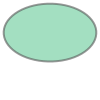

In [3]:
poly_wgs, epsg_code = io.buffered_point_poly(lng, lat, buffer)
print(epsg_code)
poly_wgs

You can then use this geometry to specify the boundaries to be used for creating a network using the [osm_graph_from_poly](https://cityseer.benchmarkurbanism.com/tools/io#osm-graph-from-poly) function.


INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer

MultiGraph with 320 nodes and 487 edges


100%|██████████| 487/487 [00:00<00:00, 52269.15it/s]


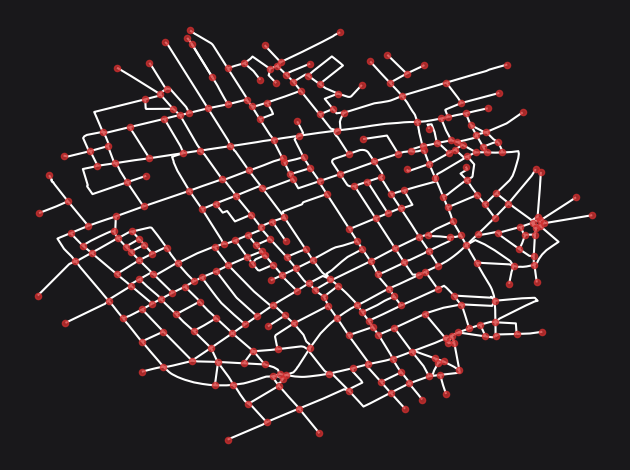

In [4]:
G = io.osm_graph_from_poly(poly_wgs)
print(G)
plot.plot_nx(G, plot_geoms=True)

Set the `projected` parameter to `True` if you would rather use the local UTM projection for the boundary.


32630


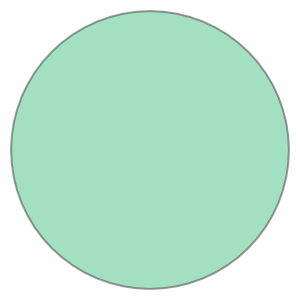

In [5]:
poly_utm, epsg_code = io.buffered_point_poly(lng, lat, buffer, projected=True)
print(epsg_code)
poly_utm

In this case, remember to set the `poly_crs` parameter to the appropriate UTM CRS if using the resultant geometry as a parameter for the [osm_graph_from_poly](https://cityseer.benchmarkurbanism.com/tools/io#osm-graph-from-poly) function.


INFO:cityseer.tools.io:Converting networkX graph from EPSG code 4326 to EPSG code 32630.
INFO:cityseer.tools.io:Processing node x, y coordinates.
INFO:cityseer.tools.io:Processing edge geom coordinates, if present.
INFO:cityseer.tools.graphs:Generating interpolated edge geometries.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.graphs:Removing dangling nodes.
INFO:cityseer.tools.graphs:Removing filler nodes.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer.tools.util:Creating edges STR tree.
INFO:cityseer.tools.graphs:Splitting opposing edges.
INFO:cityseer.tools.graphs:Squashing opposing nodes
INFO:cityseer.tools.graphs:Merging parallel edges within buffer of 25.
INFO:cityseer

MultiGraph with 320 nodes and 487 edges


100%|██████████| 487/487 [00:00<00:00, 49891.94it/s]


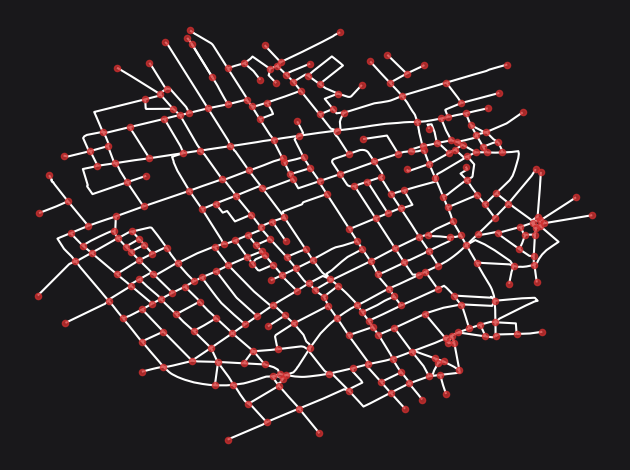

In [6]:
G_utm = io.osm_graph_from_poly(poly_utm, poly_crs_code=epsg_code)
print(G_utm)
plot.plot_nx(G_utm, plot_geoms=True)